In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
from importlib import reload
# from matplotlib import ticker

from RashbaJunction import (
    RashbaJunction, 
    PureRashba, 
    EnergyOutOfRangeError, 
    InsulatorError)
from RashbaJunction.utilities import adjuct_Tick, renormallize_result, make_grid
from RashbaJunction.ScatteringMatrix import ScatteringMatrix

ev_to_j = 1.602176634e-19

hbar = 6.582119569e-16
m = 0.015*cc.m_e
h_xy = 0.1e-3*ev_to_j# mJ

# k_z = np.sqrt(2*m*h_xy/ev_to_j)/hbar
k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr


x = 500e-9# Metr
x_prime =  k_z*x# adimensional
print(f"k_so {k_z}")
print(f"x' {x_prime}")

BASE_PATH = "plots/paper_plots_2/paper/"
FINAL_PATH = BASE_PATH+"fig_final/"


print(BASE_PATH)
print(FINAL_PATH)

font = {'family': "Times New Roman", "size": 25}

# y_label = [r"$$\frac{2 \pi \hbar}{q^2} G$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# y_label = [r"$$ \frac{G}{G_0}$$", r"$$-\frac{6 \hbar}{q \pi k_b^2 T}L$$"]
# x_label = r"$$\frac{E}{E_Z}$$"
y_label = [r"$$ G [e^2/h]$$", r"$$T_0$$"]
x_label = [r"$E_F / E_Z$", "$E_F / E_{SO, L}$", "$E_F / E_{SO}$", "$k_{SO, L}\, d$", "$E_{SO, L} / E_{SO, R}$"]

y_label_pos = [(-.05, 1.03), (-.09, 1)]

# legend_font_size = 15
legend_font_size = 18

region_lbl = ["(a)", "(b)", "(c)"]

DPI = 110

k_so 6274572.777578376
x' 3.137286388789188
plots/paper_plots_2/paper/
plots/paper_plots_2/paper/fig_final/


In [2]:
alp_r = -10
Eso_profile = [0, alp_r, 0]
x_profile = [0, 1]

junction = RashbaJunction([x_profile, Eso_profile])


def g(x, par):
    junction[1] = par[1]
    junction.interface[0] = -par[0] /2
    junction.interface[1] = par[0] / 2
    try:
        S = junction.get_scattering_matrix(x)
        return S.t_coef
    except EnergyOutOfRangeError as e:
        print(e, f"{x=}, {par=}")
        return np.nan
    except InsulatorError as e:
        print(e, f"{x=}, {par=}")
        return np.nan

        
param = [(10, .1), (10, .4), (10, 10)]

en = np.arange(-1+1e-7, 1.5, 0.011)

special_opoints = [1]
err = [-1e-10]
for p, e in zip(special_opoints, err):
    idx = np.abs(en - p).argmin()
    en[idx] = p + e

trasmission_coeff_total = make_grid(en, param, [g])#, gp])

# SAVE = True
SAVE = False

<IPython.core.display.Javascript object>


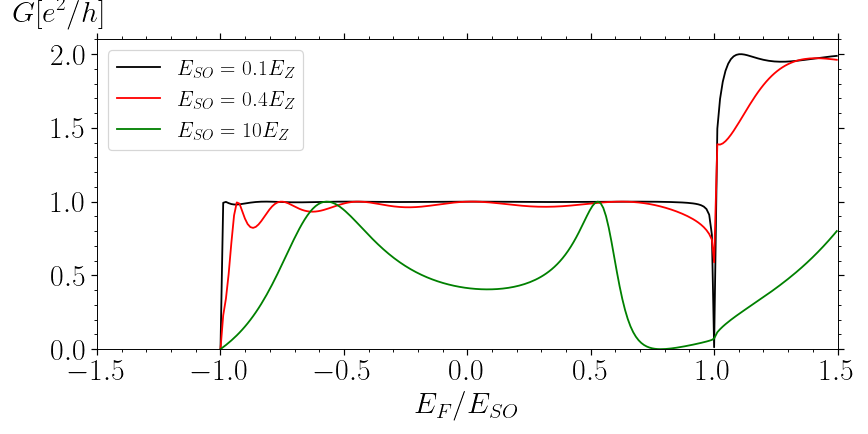

(10, 0.1)
(10, 0.4)
(10, 10)
plots/paper_plots_2/paper/Finite_rashba_nanowire_kZd=10.pdf


In [3]:
# %matplotlib inline

reload(plt)
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt 


plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=DPI, tight_layout=True, facecolor='white')

k_list = list(trasmission_coeff_total.keys())

colors = ["black", "r", "green"]
for i, k in enumerate(k_list[:3]):
    print(k)
    axs.plot(en, trasmission_coeff_total[k][0],
                   label=r"$E_{SO} = "f"{k[1]}"r"E_Z$", color=colors[i])

# axs.text(-.1, 1.225, region_lbl[0],
#             horizontalalignment='center', 
#             verticalalignment='center', 
#             transform=axs.transAxes, 
#             fontdict=font)
 
axs.set_ylim(0,2.1)
axs.set_xlim(-1.5, 1.5)

# axs.grid()
axs.legend(fontsize = legend_font_size)#, bbox_to_anchor=(0.46, 0.65))
axs.set_xlabel(x_label[2], fontdict=font)
axs.set_ylabel(y_label[0], rotation=0, fontdict=font)


axs.yaxis.set_label_coords(*y_label_pos[0])

x_magior = np.array([0.5])
x_minor = np.array([0.1])

y_magior = np.array([0.5])
y_minor = np.array([0.1])
adjuct_Tick(np.array([axs]), x_magior=x_magior, 
                    x_minor=x_minor, 
                    y_magior=y_magior, 
                    y_minor=y_minor, 
                    size =font["size"])

# plt.title(r"$k_{SO} \, d = "+f"{k_list[0][0]}$", 
# plt.title(r"$E_{SO} = "+f"{k_list[0][1]}E_Z$", 
#               fontsize = 25, x=0.5, y=1.1)

# SAVE = True
SAVE = False

save_path = BASE_PATH+f"Finite_rashba_nanowire_kZd={k[0]}.pdf"
print(save_path)

if SAVE:
    plt.savefig(save_path, 
            transparent = False, 
            bbox_inches='tight')

plt.show()

In [4]:
junction.delegate

In [59]:
N = 1000
monets = {i: "up" for i in range(1, N+1)}
flip = {"up": "down", "down": "up"}

for i in range(1, N+1):
    for k, v in monets.items():
#     print(k, v)
        monets.update({k: flip[v]}) if k%i == 0 else None


# for v in monets.values():
#     print(v)

print(monets)
print(sum([1 for v in monets.values() if v == "down" ]))
print([k for k, v in monets.items() if v == "down" ])

{1: 'down', 2: 'up', 3: 'up', 4: 'down', 5: 'up', 6: 'up', 7: 'up', 8: 'up', 9: 'down', 10: 'up', 11: 'up', 12: 'up', 13: 'up', 14: 'up', 15: 'up', 16: 'down', 17: 'up', 18: 'up', 19: 'up', 20: 'up', 21: 'up', 22: 'up', 23: 'up', 24: 'up', 25: 'down', 26: 'up', 27: 'up', 28: 'up', 29: 'up', 30: 'up', 31: 'up', 32: 'up', 33: 'up', 34: 'up', 35: 'up', 36: 'down', 37: 'up', 38: 'up', 39: 'up', 40: 'up', 41: 'up', 42: 'up', 43: 'up', 44: 'up', 45: 'up', 46: 'up', 47: 'up', 48: 'up', 49: 'down', 50: 'up', 51: 'up', 52: 'up', 53: 'up', 54: 'up', 55: 'up', 56: 'up', 57: 'up', 58: 'up', 59: 'up', 60: 'up', 61: 'up', 62: 'up', 63: 'up', 64: 'down', 65: 'up', 66: 'up', 67: 'up', 68: 'up', 69: 'up', 70: 'up', 71: 'up', 72: 'up', 73: 'up', 74: 'up', 75: 'up', 76: 'up', 77: 'up', 78: 'up', 79: 'up', 80: 'up', 81: 'down', 82: 'up', 83: 'up', 84: 'up', 85: 'up', 86: 'up', 87: 'up', 88: 'up', 89: 'up', 90: 'up', 91: 'up', 92: 'up', 93: 'up', 94: 'up', 95: 'up', 96: 'up', 97: 'up', 98: 'up', 99: 'up', 